# Stock Market Analysis 


Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly Amazon. We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib.
We'll be answering the following questions along the way:

    1.) What was Amazon's overall stock performance in 2023 compared to the broader market?
    2.) How did Amazon's stock price trend throughout the year?
    3.) What were the major events or news that impacted Amazon's stock price?
    4.) What were the most volatile periods for Amazon's stock during the year?
    5.) Did Amazon's stock outperform or underperform its own historical averages?

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

In [ ]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install -q yfinance

In [ ]:
!pip install --upgrade yfinance

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install ta

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import yfinance as yf
from ta import add_all_ta_features

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

tickers = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'GOOGL': 'Alphabet Inc.',
    'AMZN': 'Amazon.com, Inc.',
    'TSLA': 'Tesla, Inc.',
    'NFLX': 'Netflix, Inc.',
    'NVDA': 'NVIDIA Corporation',
    'JPM': 'JPMorgan Chase & Co.',
    'V': 'Visa Inc.',
    'PG': 'Procter & Gamble Co.',
    'UNH': 'UnitedHealth Group Incorporated',
    'HD': 'The Home Depot, Inc.',
    'DIS': 'The Walt Disney Company',
    'PYPL': 'PayPal Holdings, Inc.',
    'INTC': 'Intel Corporation',
    'CMCSA': 'Comcast Corporation',
    'PEP': 'PepsiCo, Inc.',
    'KO': 'The Coca-Cola Company'
}

end = datetime(2023, 12, 31)
start = datetime(end.year - 4, end.month, end.day)
data = yf.download(list(tickers.keys()), start = start, end = end)

print("Downloaded Data:")
data.head()

[*********************100%***********************]  18 of 18 completed


Downloaded Data:


Price       Adj Close                                               \
Ticker           AAPL       AMZN      CMCSA         DIS      GOOGL   
Date                                                                 
2019-12-31  71.172142  92.391998  39.696976  143.498138  66.804077   
2020-01-02  72.796021  94.900497  40.050072  147.040192  68.264961   
2020-01-03  72.088295  93.748497  39.732273  145.353500  67.907845   
2020-01-06  72.662712  95.143997  39.432148  144.510147  69.717865   
2020-01-07  72.320961  95.343002  39.849003  144.559753  69.583206   

Price                                                                 ...  \
Ticker              HD       INTC         JPM         KO        MSFT  ...   
Date                                                                  ...   
2019-12-31  193.591370  52.793198  120.642014  47.403049  150.837753  ...   
2020-01-02  194.726059  53.666466  122.104637  47.094742  153.630707  ...   
2020-01-03  194.078934  53.013721  120.493263  46.837811  151.717773  ...   
2020-01-06  194.991989  52.863762  120.397484  46.820675  152.109848  ...   
2020-01-07  193.715485  51.981670  118.350647  46.460983  150.722977  ...   

Price         Volume                                                           \
Ticker            KO      MSFT     NFLX       NVDA      PEP       PG     PYPL   
Date                                                                            
2019-12-31   7982600  18369400  3713300  231004000  3229400  4798900  4080500   
2020-01-02  11867700  22622100  4485800  237536000  3784100  8130800  7418800   
2020-01-03  11354500  21116200  3806900  205384000  4000100  7970500  7098300   
2020-01-06  14698300  20813700  5663100  262636000  4085100  6674400  6764500   
2020-01-07   9973900  21634100  4703200  314856000  5718100  7583400  6898700   

Price                                     
Ticker           TSLA      UNH         V  
Date                                      
2019-12-31  154285500  2224200   5273000  
2020-01-02  142981500  2543400   8733000  
2020-01-03  266677500  2711400   4899700  
2020-01-06  151995000  3079100  10109500  
2020-01-07  268231500  2492900   4392300  

[5 rows x 108 columns]

In [ ]:
data.shape

(1007, 108)

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [ ]:
from ta import add_all_ta_features
import yfinance 

amzn = yfinance.download('AMZN', start = start, end = end)
amzn.columns = [' '.join(col).strip() for col in amzn.columns.values]
print(amzn.shape)
print('\n')
print(amzn.info())
print('\n')
print(amzn.describe())

[*********************100%***********************]  1 of 1 completed

(1007, 6)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2019-12-31 to 2023-12-29
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close AMZN  1007 non-null   float64
 1   Close AMZN      1007 non-null   float64
 2   High AMZN       1007 non-null   float64
 3   Low AMZN        1007 non-null   float64
 4   Open AMZN       1007 non-null   float64
 5   Volume AMZN     1007 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1 KB
None


       Adj Close AMZN   Close AMZN    High AMZN     Low AMZN    Open AMZN  \
count     1007.000000  1007.000000  1007.000000  1007.000000  1007.000000   
mean       137.171734   137.171734   138.988404   135.333065   137.210403   
std         27.491461    27.491461    27.632260    27.435005    27.599460   
min         81.820000    81.820000    83.480003    81.301498    82.075500   
25%        114.234001   114.234001   116.060001   112.340000 

# Information About the Data

In [ ]:
amzn_finances = add_all_ta_features(amzn, open = 'Open AMZN', high = 'High AMZN', low = 'Low AMZN', close = 'Close AMZN', volume = 'Volume AMZN')
amzn_finances.shape
amzn_finances.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2019-12-31 to 2023-12-29
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Adj Close AMZN             1007 non-null   float64
 1   Close AMZN                 1007 non-null   float64
 2   High AMZN                  1007 non-null   float64
 3   Low AMZN                   1007 non-null   float64
 4   Open AMZN                  1007 non-null   float64
 5   Volume AMZN                1007 non-null   int64  
 6   volume_adi                 1007 non-null   float64
 7   volume_obv                 1007 non-null   int64  
 8   volume_cmf                 988 non-null    float64
 9   volume_fi                  994 non-null    float64
 10  volume_em                  1006 non-null   float64
 11  volume_sma_em              993 non-null    float64
 12  volume_vpt                 1006 non-null   float64
 13  volume_vwap                994

In [ ]:
amzn_finances.describe()

,Adj Close AMZN,Close AMZN,High AMZN,Low AMZN,Open AMZN,Volume AMZN,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03,1.007000e+03,1.007000e+03,988.000000,9.940000e+02,...,982.000000,974.000000,974.000000,982.000000,974.000000,974.000000,998.000000,1006.000000,1006.000000,1007.000000
mean,137.171734,137.171734,138.988404,135.333065,137.210403,7.535398e+07,5.920553e+08,2.410577e+09,0.018735,3.651223e+06,...,0.261457,0.242501,-0.005047,-0.831960,-0.859694,-0.053266,137.076485,0.077606,0.049448,48.467115
std,27.491461,27.491461,27.632260,27.435005,27.599460,3.382021e+07,3.919244e+08,7.958390e+08,0.131521,1.104617e+08,...,2.551401,2.394565,0.789754,7.768880,6.216530,4.131841,27.100585,2.374398,2.373817,29.755241
min,81.820000,81.820000,83.480003,81.301498,82.075500,2.237840e+07,-4.688470e+08,-3.825500e+08,-0.339122,-7.942659e+08,...,-9.440716,-8.297087,-2.567319,-15.706275,-13.584308,-10.714989,87.105542,-14.049438,-15.139791,-11.442548
25%,114.234001,114.234001,116.060001,112.340000,113.705002,5.275910e+07,2.943922e+08,2.105162e+09,-0.077786,-3.278287e+07,...,-1.075114,-1.031482,-0.440110,-6.278177,-4.938214,-2.845238,115.284439,-1.215412,-1.222859,23.640578
50%,140.570007,140.570007,143.369995,138.929504,140.800003,6.572600e+07,6.382914e+08,2.572492e+09,0.010596,9.593629e+06,...,0.371336,0.362757,-0.011678,-1.827784,-1.501479,-0.271888,139.072427,0.078929,0.078897,52.145218
75%,161.190247,161.190247,162.880005,159.205002,161.142746,8.728310e+07,8.558057e+08,2.993274e+09,0.112850,5.076998e+07,...,2.036568,1.883065,0.435273,3.225861,2.436862,2.188413,161.065421,1.335431,1.326593,74.463427
max,186.570496,186.570496,188.654007,184.839493,187.199997,3.113460e+08,1.379826e+09,3.530919e+09,0.385155,4.115942e+08,...,5.942826,5.181420,2.773234,27.382719,18.797673,20.952654,182.172515,13.535902,12.694892,101.933608


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [ ]:
amzn_return = round(np.log(amzn['Close AMZN']).diff() * 100, 2)
amzn_return.dropna(inplace = True)
amzn_return.head()

Date
2020-01-02    2.68
2020-01-03   -1.22
2020-01-06    1.48
2020-01-07    0.21
2020-01-08   -0.78
Name: Close AMZN, dtype: float64

<Axes: xlabel='Date'>

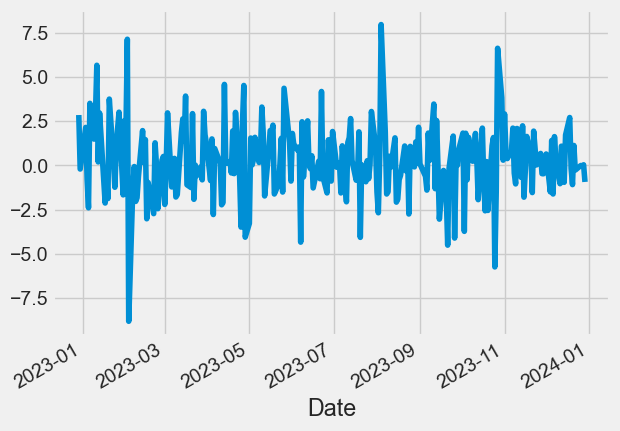

In [ ]:
amzn_return[-252:].plot()

In [ ]:
amzn_return.describe()

count    1006.000000
mean        0.049453
std         2.373759
min       -15.140000
25%        -1.220000
50%         0.080000
75%         1.327500
max        12.690000
Name: Close AMZN, dtype: float64

In [ ]:
# Spicy Stats

from scipy import stats
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

In [ ]:
print(n)

1006


In [ ]:
print(std)

2.373758905742371


In [ ]:
print(minmax)  

(-15.14, 12.69)


In [ ]:
print(var)

5.634731342591218


In [ ]:
print(skew)

-0.10884097285370169


In [ ]:
print(std)

2.373758905742371


# Question 1: What was Amazon's overall stock performance in 2023 compared to the broader market?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

[*********************100%***********************]  1 of 1 completed


(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01')])

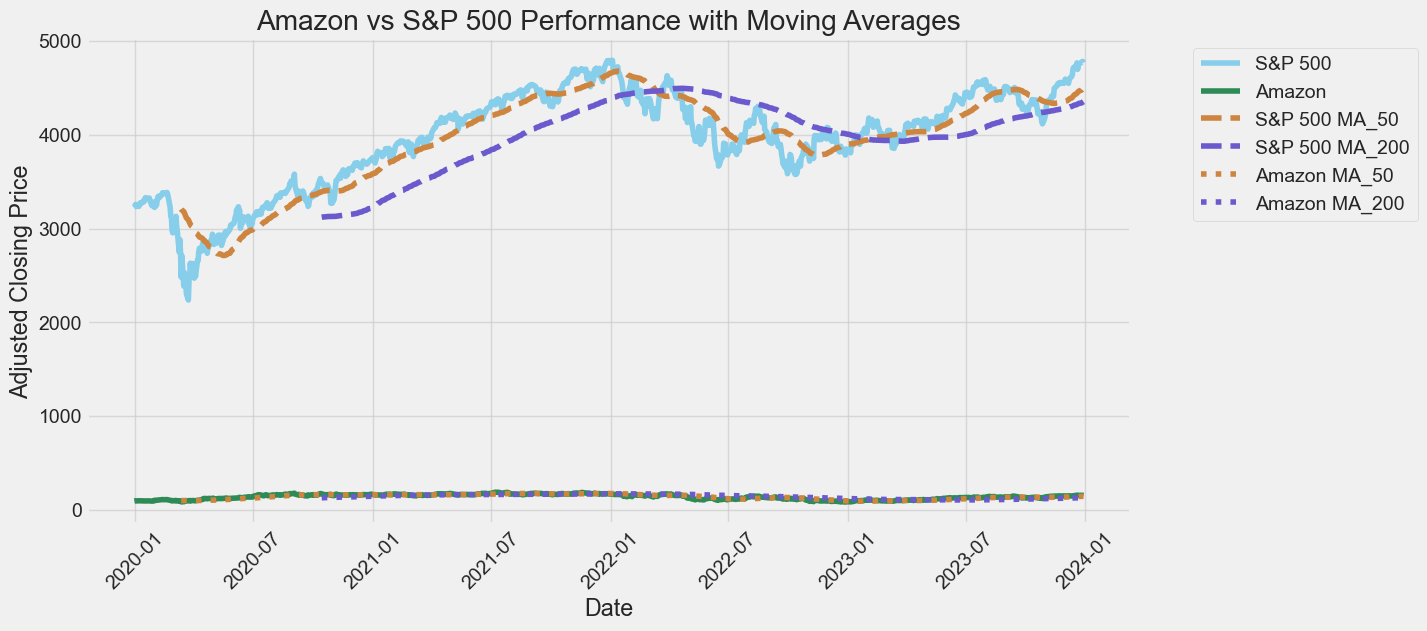

In [ ]:
sp500 = yfinance.download('^GSPC', start = start, end = end)

# Calculate moving averages for both S&P 500 and Amazon

sp500['MA_50'] = sp500['Close'].rolling(window = 50).mean()
sp500['MA_200'] = sp500['Close'].rolling(window = 200).mean()

amzn['MA_50'] = amzn['Adj Close AMZN'].rolling(window = 50).mean()
amzn['MA_200'] = amzn['Adj Close AMZN'].rolling(window = 200).mean()

# Plot Amazon vs S&P 500 with moving averages

plt.figure(figsize = (12, 6))
plt.plot(sp500.index, sp500['Close'], label = 'S&P 500', color = 'skyblue')
plt.plot(amzn.index, amzn['Adj Close AMZN'], label = 'Amazon', color = 'seagreen')
plt.plot(sp500.index, sp500['MA_50'], label = 'S&P 500 MA_50', color = 'peru', linestyle = '--')
plt.plot(sp500.index, sp500['MA_200'], label = 'S&P 500 MA_200', color = 'slateblue', linestyle = '--')
plt.plot(amzn.index, amzn['MA_50'], label = 'Amazon MA_50', color = 'peru', linestyle = ':')
plt.plot(amzn.index, amzn['MA_200'], label = 'Amazon MA_200', color = 'slateblue', linestyle = ':')
plt.title('Amazon vs S&P 500 Performance with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)
plt.grid(True, alpha = 0.7)
plt.xticks(rotation = 45)
plt.title('Amazon vs S&P 500 Performance with Moving Averages')
plt.xticks(rotation = 45)

[*********************100%***********************]  5 of 5 completed


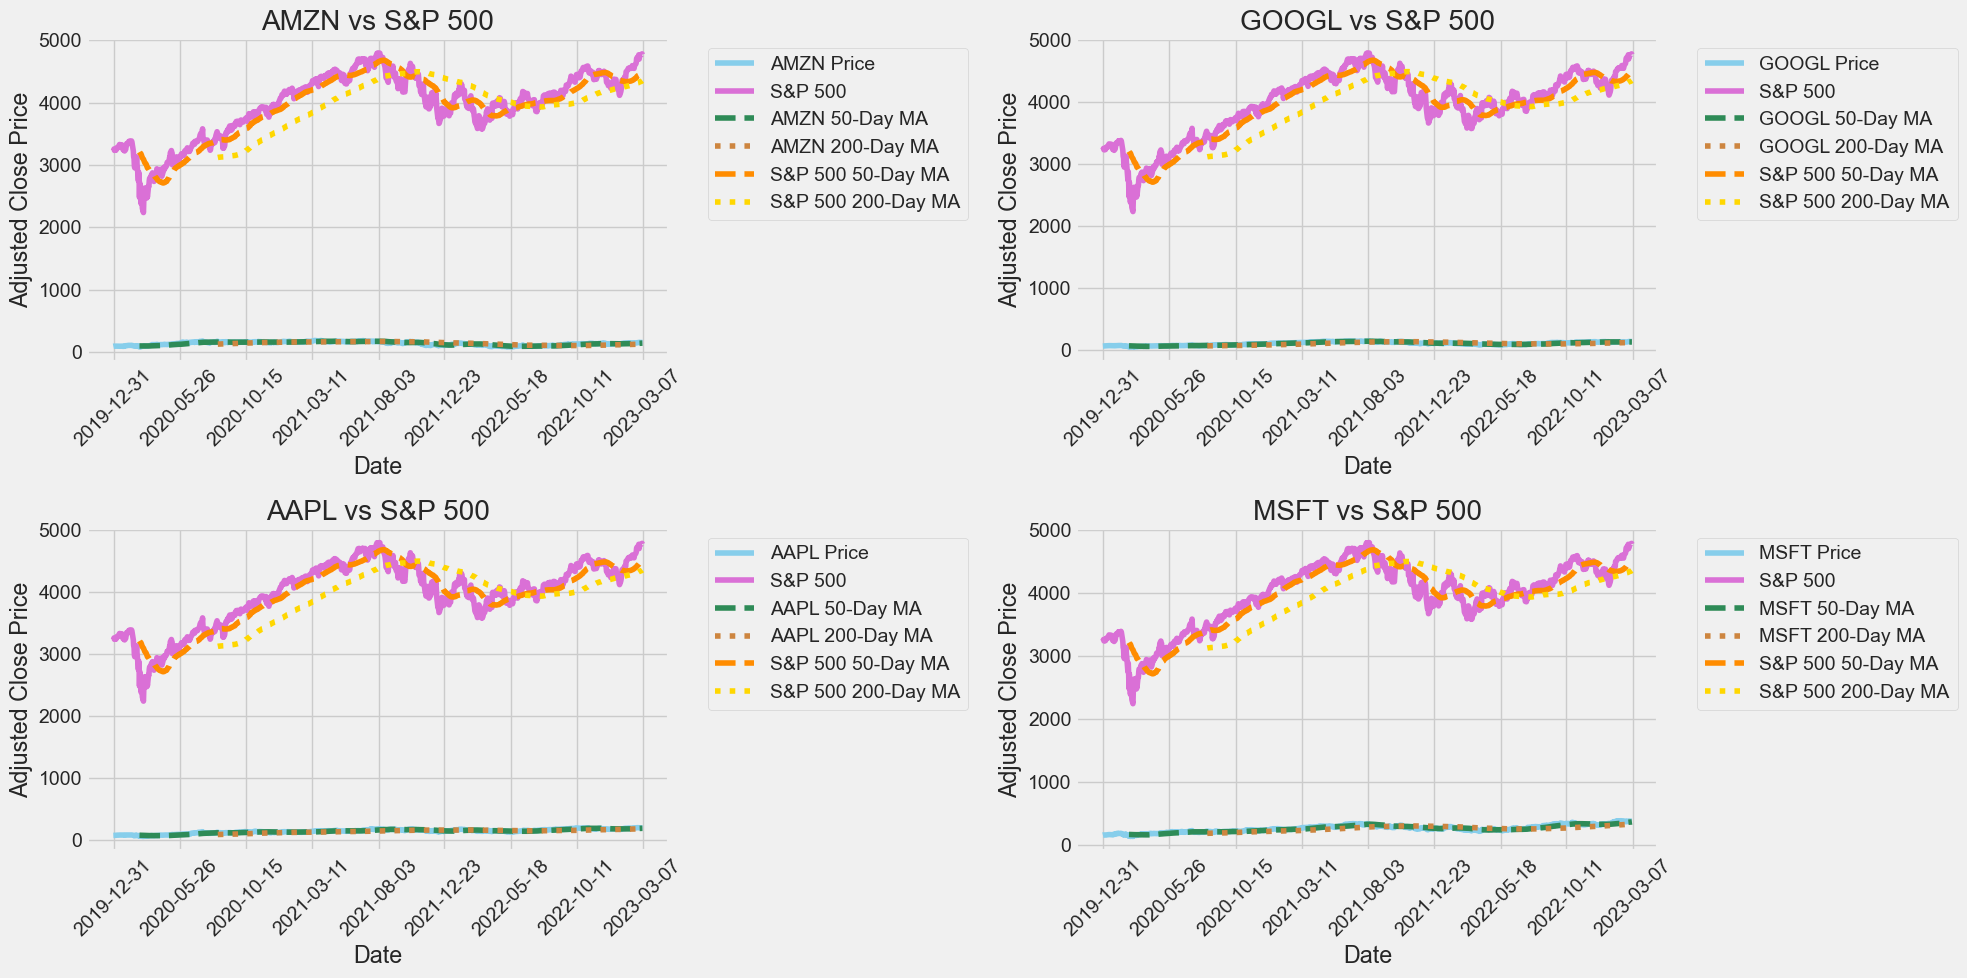

In [ ]:
tickers = ['AMZN', 'GOOGL', 'AAPL', 'MSFT', '^GSPC']

# Download stock data for the defined tickers
data = yf.download(tickers, start = start, end = end)

# Calculate moving averages (e.g., 50-day and 200-day)
moving_avg_50 = data['Adj Close'].rolling(window = 50).mean()
moving_avg_200 = data['Adj Close'].rolling(window = 200).mean()
moving_avg_50_sp500 = moving_avg_50['^GSPC']
moving_avg_200_sp500 = moving_avg_200['^GSPC']


# Create subplots
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
axs = axs.flatten()

# Plot each company's stock price against the S&P 500
for i, ticker in enumerate(tickers[:-1]):  # Exclude S&P 500 from individual plots
    axs[i].plot(data['Adj Close'][ticker], label = f'{ticker} Price', color = 'skyblue')
    axs[i].plot(data['Adj Close']['^GSPC'], label = 'S&P 500', color = 'orchid')
    axs[i].plot(moving_avg_50[ticker], label = f'{ticker} 50-Day MA', linestyle='--', color = 'seagreen')
    axs[i].plot(moving_avg_200[ticker], label = f'{ticker} 200-Day MA', linestyle=':', color = 'peru')
    axs[i].plot(moving_avg_50_sp500, label = 'S&P 500 50-Day MA', linestyle = '--', color = 'darkorange')
    axs[i].plot(moving_avg_200_sp500, label = 'S&P 500 200-Day MA', linestyle = ':', color = 'gold')   
    axs[i].set_title(f'{ticker} vs S&P 500')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Adjusted Close Price')
    axs[i].legend(bbox_to_anchor = (1.05, 1), loc = 2)
    axs[i].set_xticklabels(data.index[::len(data.index)//10].date, rotation = 45) 
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

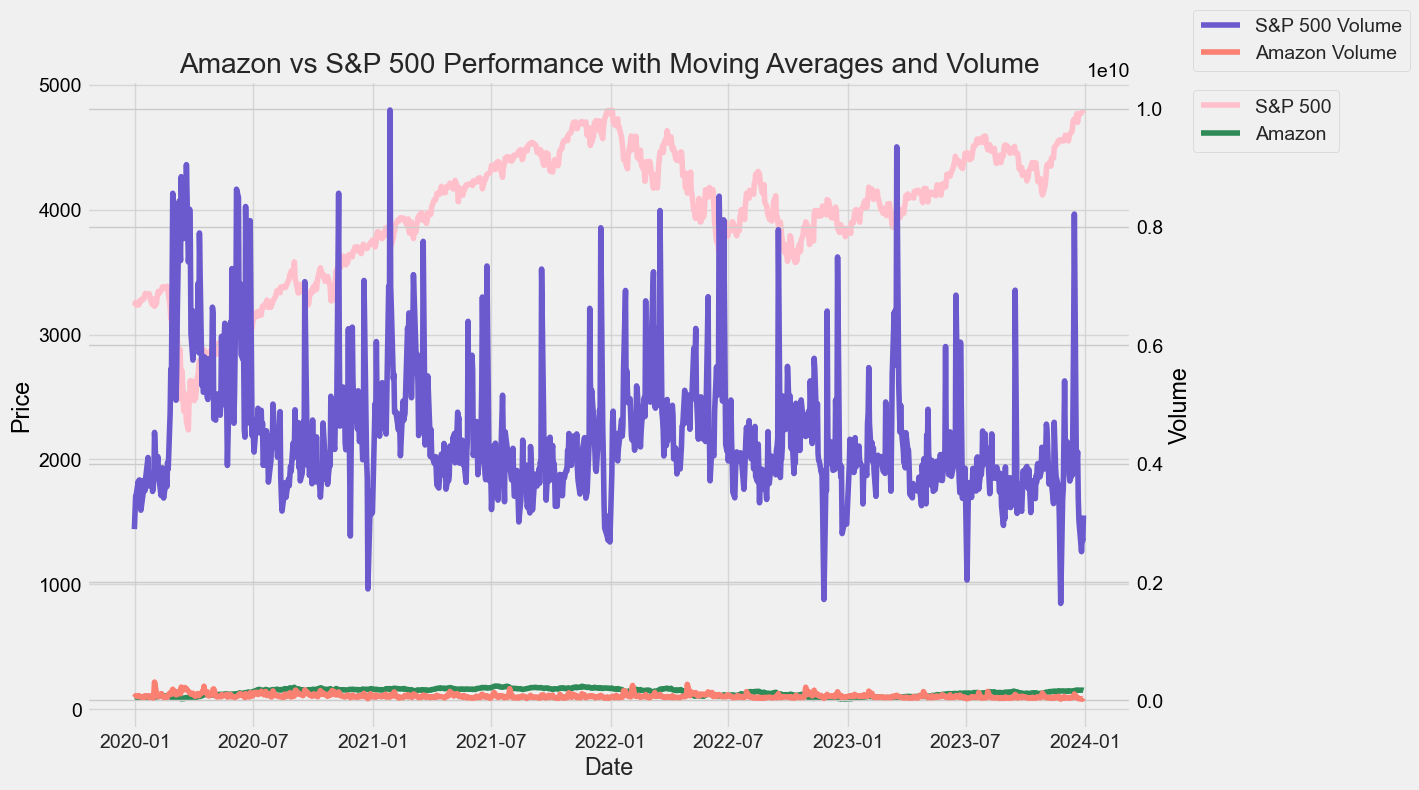

In [ ]:
# Adding volume subplot


fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.plot(sp500.index, sp500['Close'], label = 'S&P 500', color = 'pink')
ax1.plot(amzn.index, amzn['Adj Close AMZN'], label = 'Amazon', color = 'seagreen')
ax1.set_title('Amazon vs S&P 500 Performance with Moving Averages and Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='k')
ax1.tick_params(axis = 'y', labelcolor = 'k')
ax1.legend(bbox_to_anchor = (1.05, 1), loc = 2)
ax1.grid(True, alpha = 0.7)

ax2 = ax1.twinx()
ax2.plot(sp500.index, sp500['Volume'], label = 'S&P 500 Volume', color = 'slateblue')
ax2.plot(amzn.index, amzn['Volume AMZN'], label = 'Amazon Volume', color = 'salmon')
ax2.set_ylabel('Volume', color = 'k')
ax2.tick_params(axis = 'y', labelcolor = 'k')
ax2.legend(bbox_to_anchor = (1.05, 1), loc = 3)

[*********************100%***********************]  5 of 5 completed


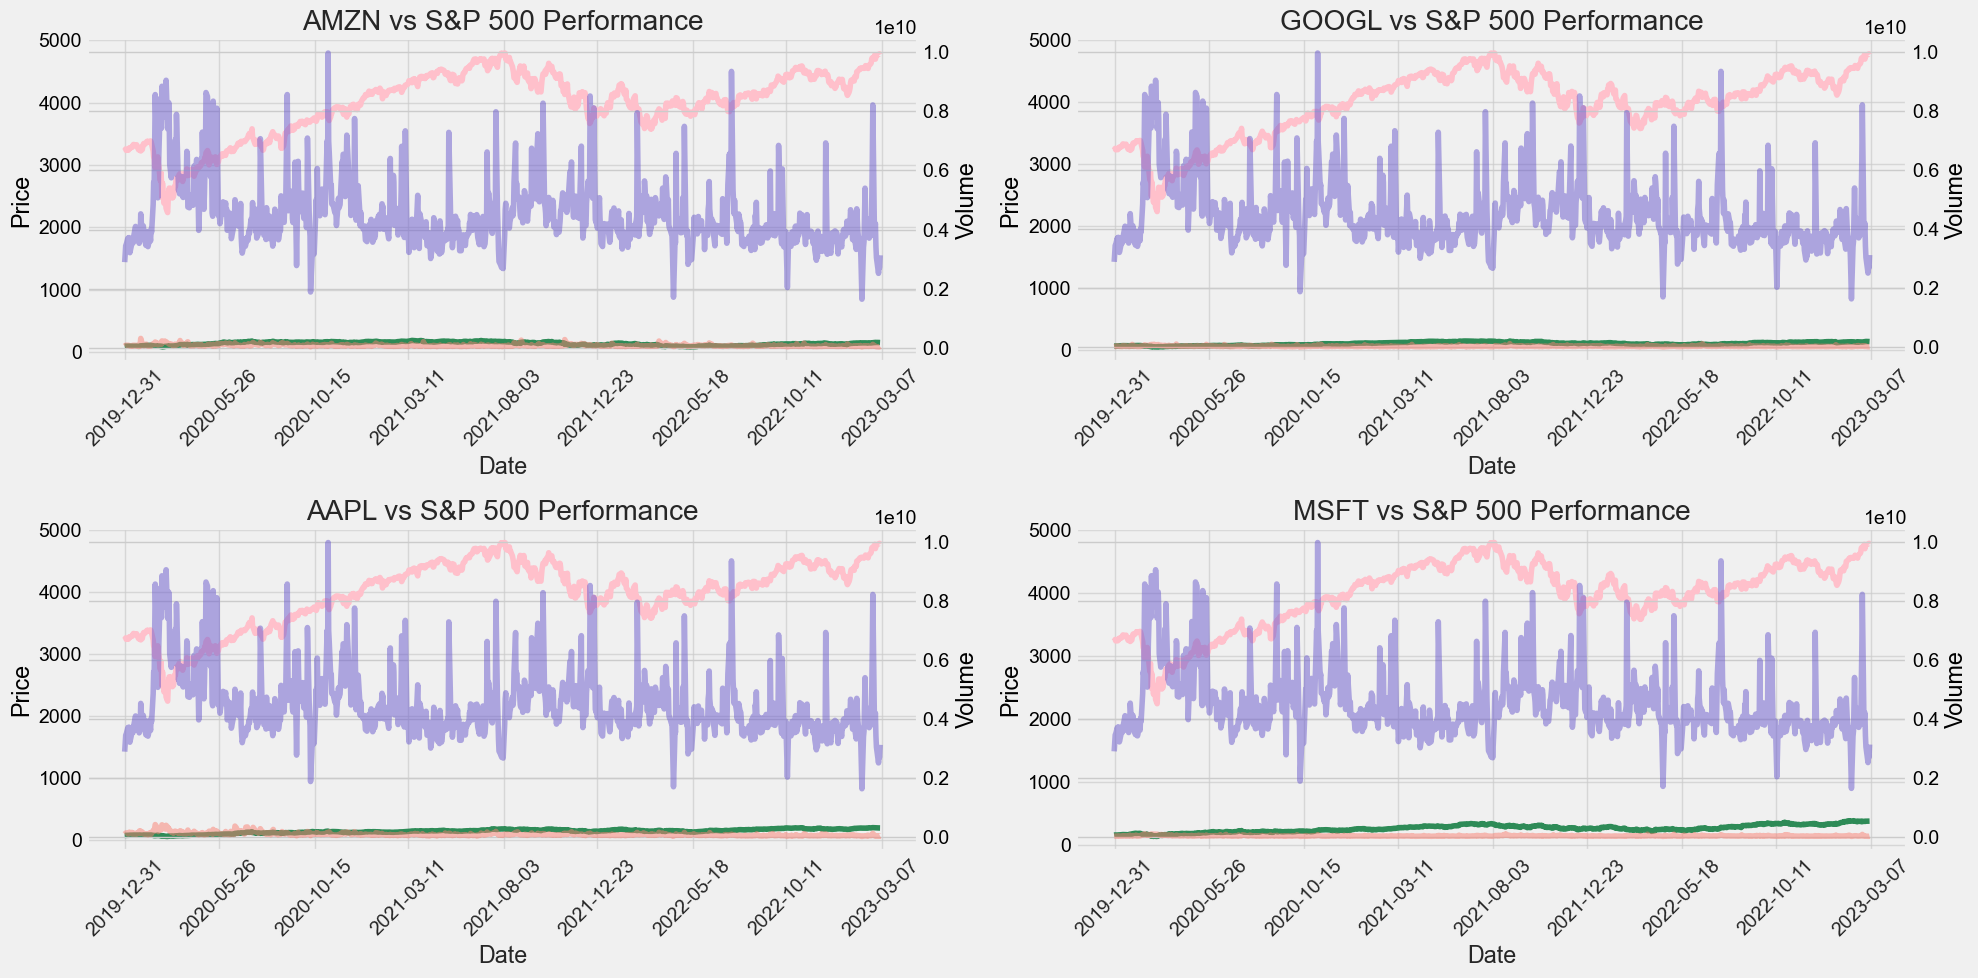

In [ ]:
tickers = ['AMZN', 'GOOGL', 'AAPL', 'MSFT', '^GSPC']
data = yf.download(tickers, start = start, end = end)
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
axs = axs.flatten()

# Plotting each company's stock price and volume against the S&P 500
for i, ticker in enumerate(tickers[:-1]): 
    ax1 = axs[i]
    
    # Plot price data
    ax1.plot(data['Adj Close'][ticker], label = f'{ticker} Price', color = 'seagreen')
    ax1.plot(data['Adj Close']['^GSPC'], label = 'S&P 500', color = 'pink')
    ax1.set_title(f'{ticker} vs S&P 500 Performance')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price', color = 'k')
    ax1.tick_params(axis='y', labelcolor = 'k')
    ax1.set_xticklabels(data.index[::len(data.index)//10].date, rotation = 45) 
    ax1.grid(True, alpha=0.7)

    # Create a second y-axis for volume
    ax2 = ax1.twinx()
    ax2.plot(data['Volume'][ticker], label = f'{ticker} Volume', color = 'salmon', alpha = 0.5)
    ax2.plot(data['Volume']['^GSPC'], label = 'S&P 500 Volume', color = 'slateblue', alpha = 0.5)
    ax2.set_ylabel('Volume', color = 'k')
    ax2.tick_params(axis = 'y', labelcolor = 'k')
    ax2.set_xticklabels(data.index[::len(data.index)//10].date, rotation = 45) 

plt.tight_layout()
plt.show()

# Question 2: How did Amazon's stock price trend throughout the year?

Let's go ahead and use pandas to retrieve teh daily returns for the Amazon stock. The pct_change() function is commonly used in data analysis, particularly with libraries like Pandas in Python. It calculates the percentage change between the current and a prior element in a DataFrame or Series.

In [ ]:
amzn['Daily_Returns'] = amzn['Adj Close AMZN'].pct_change()
amzn['Daily_Returns']

Date
2019-12-31         NaN
2020-01-02    0.027151
2020-01-03   -0.012139
2020-01-06    0.014886
2020-01-07    0.002092
                ...   
2023-12-22   -0.002730
2023-12-26   -0.000065
2023-12-27   -0.000456
2023-12-28    0.000261
2023-12-29   -0.009388
Name: Daily_Returns, Length: 1007, dtype: float64

Great, now let's get an overall look at the average daily return using a histogram.

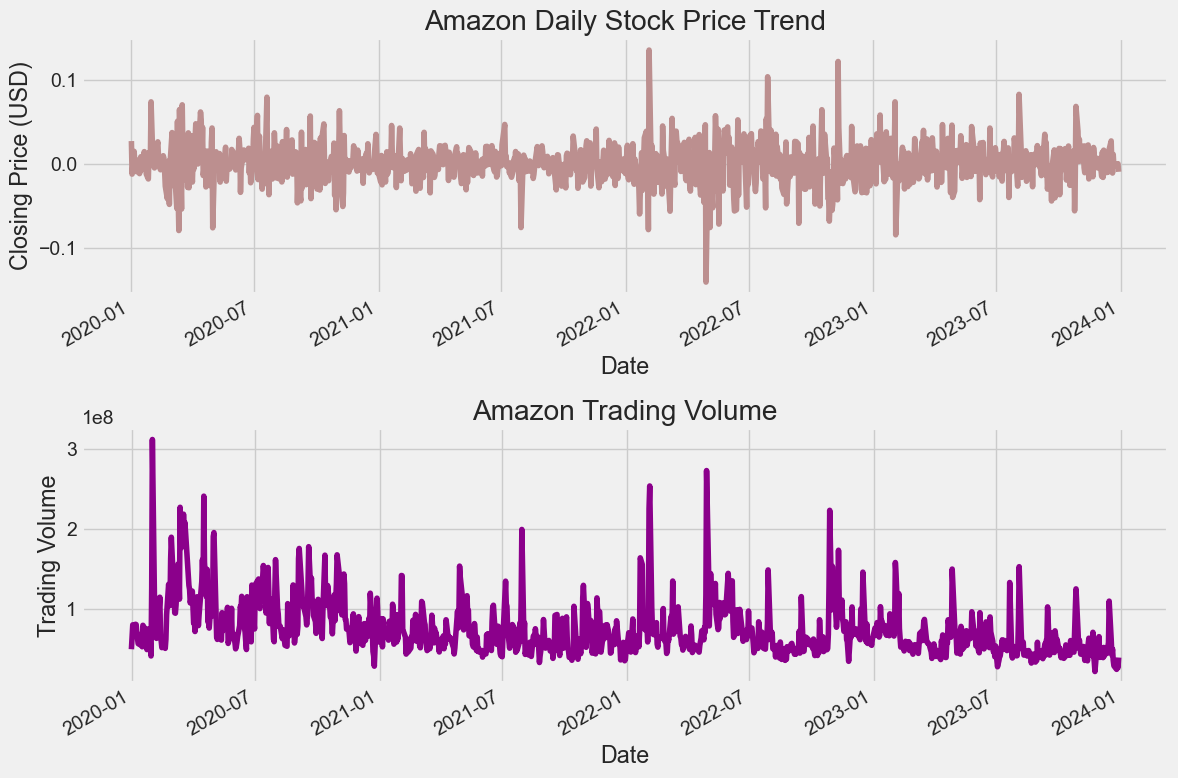

In [ ]:
# Plot daily closing prices with volume

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 8))

amzn['Daily_Returns'].plot(ax = ax1, color = 'rosybrown')
ax1.set_title('Amazon Daily Stock Price Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (USD)')

amzn['Volume AMZN'].plot(ax = ax2, color = 'darkmagenta')
ax2.set_title('Amazon Trading Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Trading Volume')

plt.tight_layout()
plt.show()


[*********************100%***********************]  5 of 5 completed


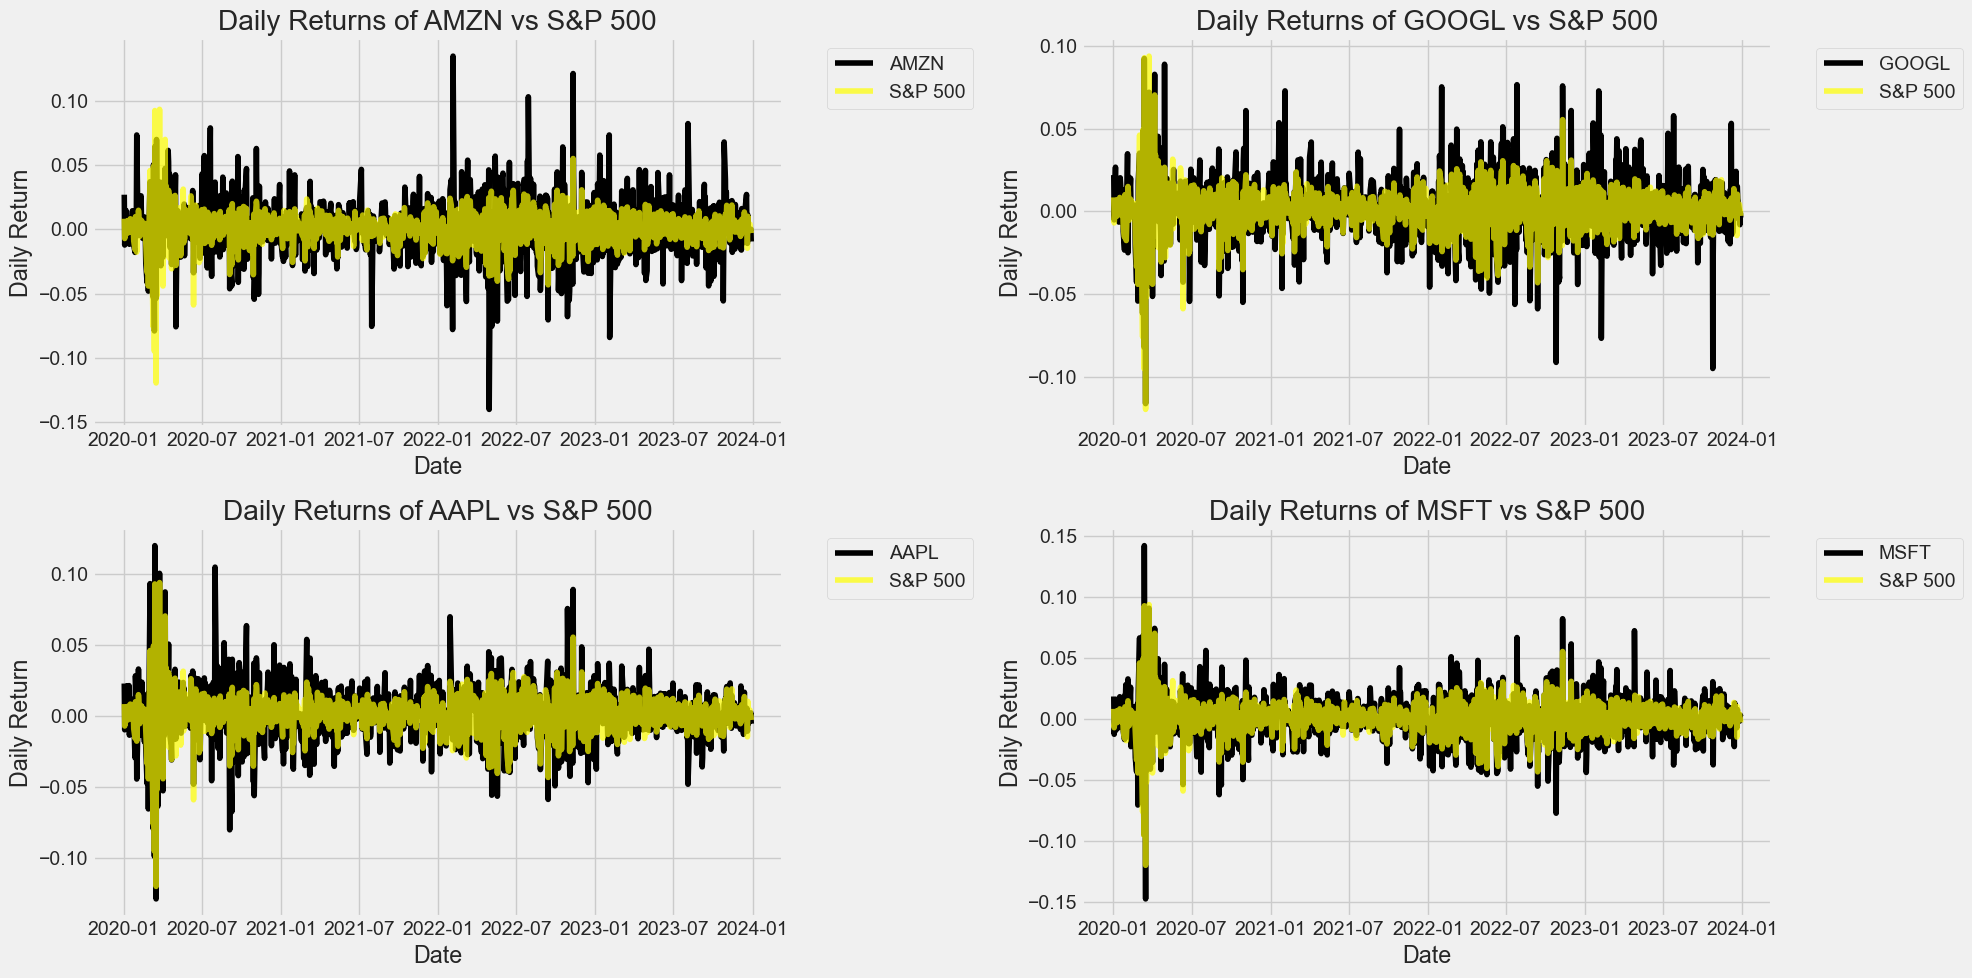

In [ ]:
tickers = ['AMZN', 'GOOGL', 'AAPL', 'MSFT', '^GSPC']
data = yf.download(tickers, start = start, end = end)
returns = data['Adj Close'].pct_change()

fig, axs = plt.subplots(2, 2, figsize = (20, 10))
axs = axs.flatten()

# Plotting daily returns for each company and S&P 500

for i, ticker in enumerate(tickers[:-1]):  
    axs[i].plot(returns.index, returns[ticker], label = ticker, color = 'black')
    axs[i].plot(returns.index, returns['^GSPC'], label = 'S&P 500', color = 'yellow', alpha = 0.7)
    axs[i].set_title(f'Daily Returns of {ticker} vs S&P 500')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Daily Return')
    axs[i].legend(bbox_to_anchor = (1.05, 1), loc = 2)
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

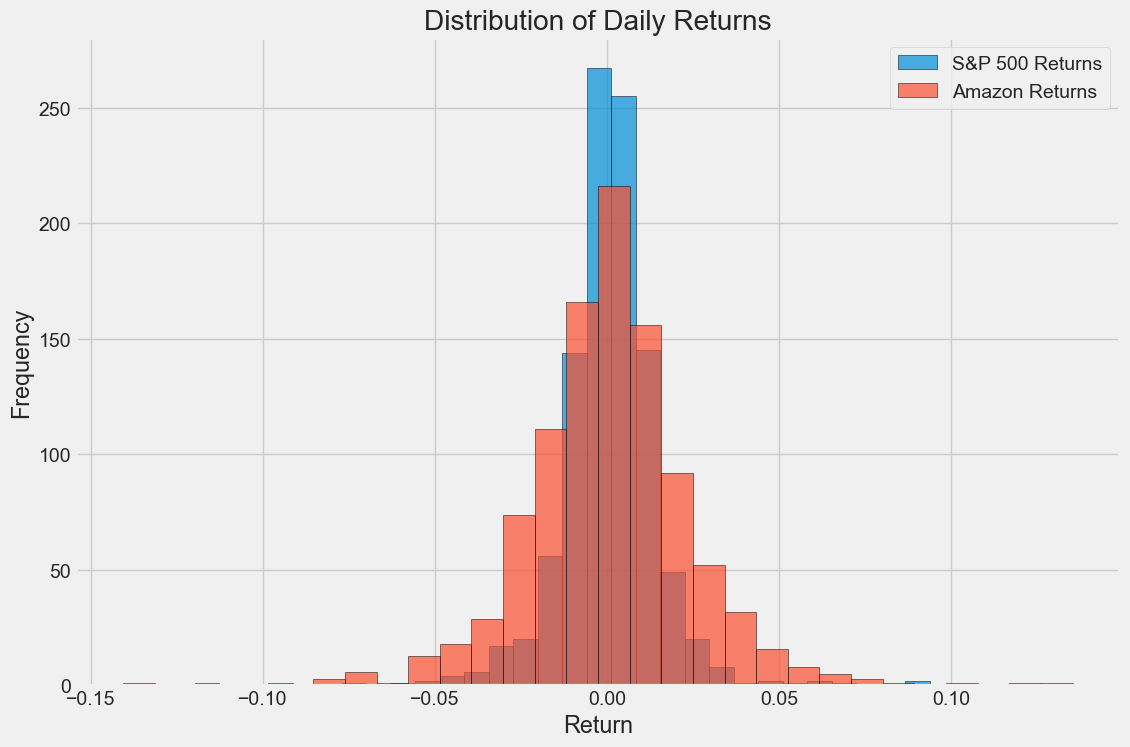

In [ ]:
sp500_returns = sp500['Close'].pct_change().dropna()
amzn_returns = amzn['Adj Close AMZN'].pct_change().dropna()

plt.figure(figsize = (12, 8))
plt.hist(sp500_returns, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'S&P 500 Returns')
plt.hist(amzn_returns, bins = 30, edgecolor = 'black', alpha = 0.7, label = 'Amazon Returns')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Question 3: What were the major events or news that impacted Amazon's stock price?

In [ ]:
# Identifying significant days (top 10 highest and lowest returns)

significant_days = pd.concat([amzn.nlargest(10, 'Daily_Returns'), amzn.nsmallest(10, 'Daily_Returns')])

# Heatmap of returns around significant events
def get_returns_window(df, date, window_size = 15):
    start_date = df.index.get_loc(date) - window_size
    end_date = df.index.get_loc(date) + window_size
    return df.iloc[start_date:end_date]['Daily_Returns']

returns_windows = []
for date in significant_days.index:
    window = get_returns_window(amzn, date)
    returns_windows.append(window.values)

max_length = max(len(window) for window in returns_windows)
padded_returns_windows = np.array([np.pad(window, (0, max_length - len(window)), mode = 'constant', constant_values = np.nan) for window in returns_windows])
normalized_returns = (padded_returns_windows - np.nanmin(padded_returns_windows, axis = 1, keepdims = True)) / (np.nanmax(padded_returns_windows, axis = 1, keepdims = True) - np.nanmin(padded_returns_windows, axis = 1, keepdims = True))

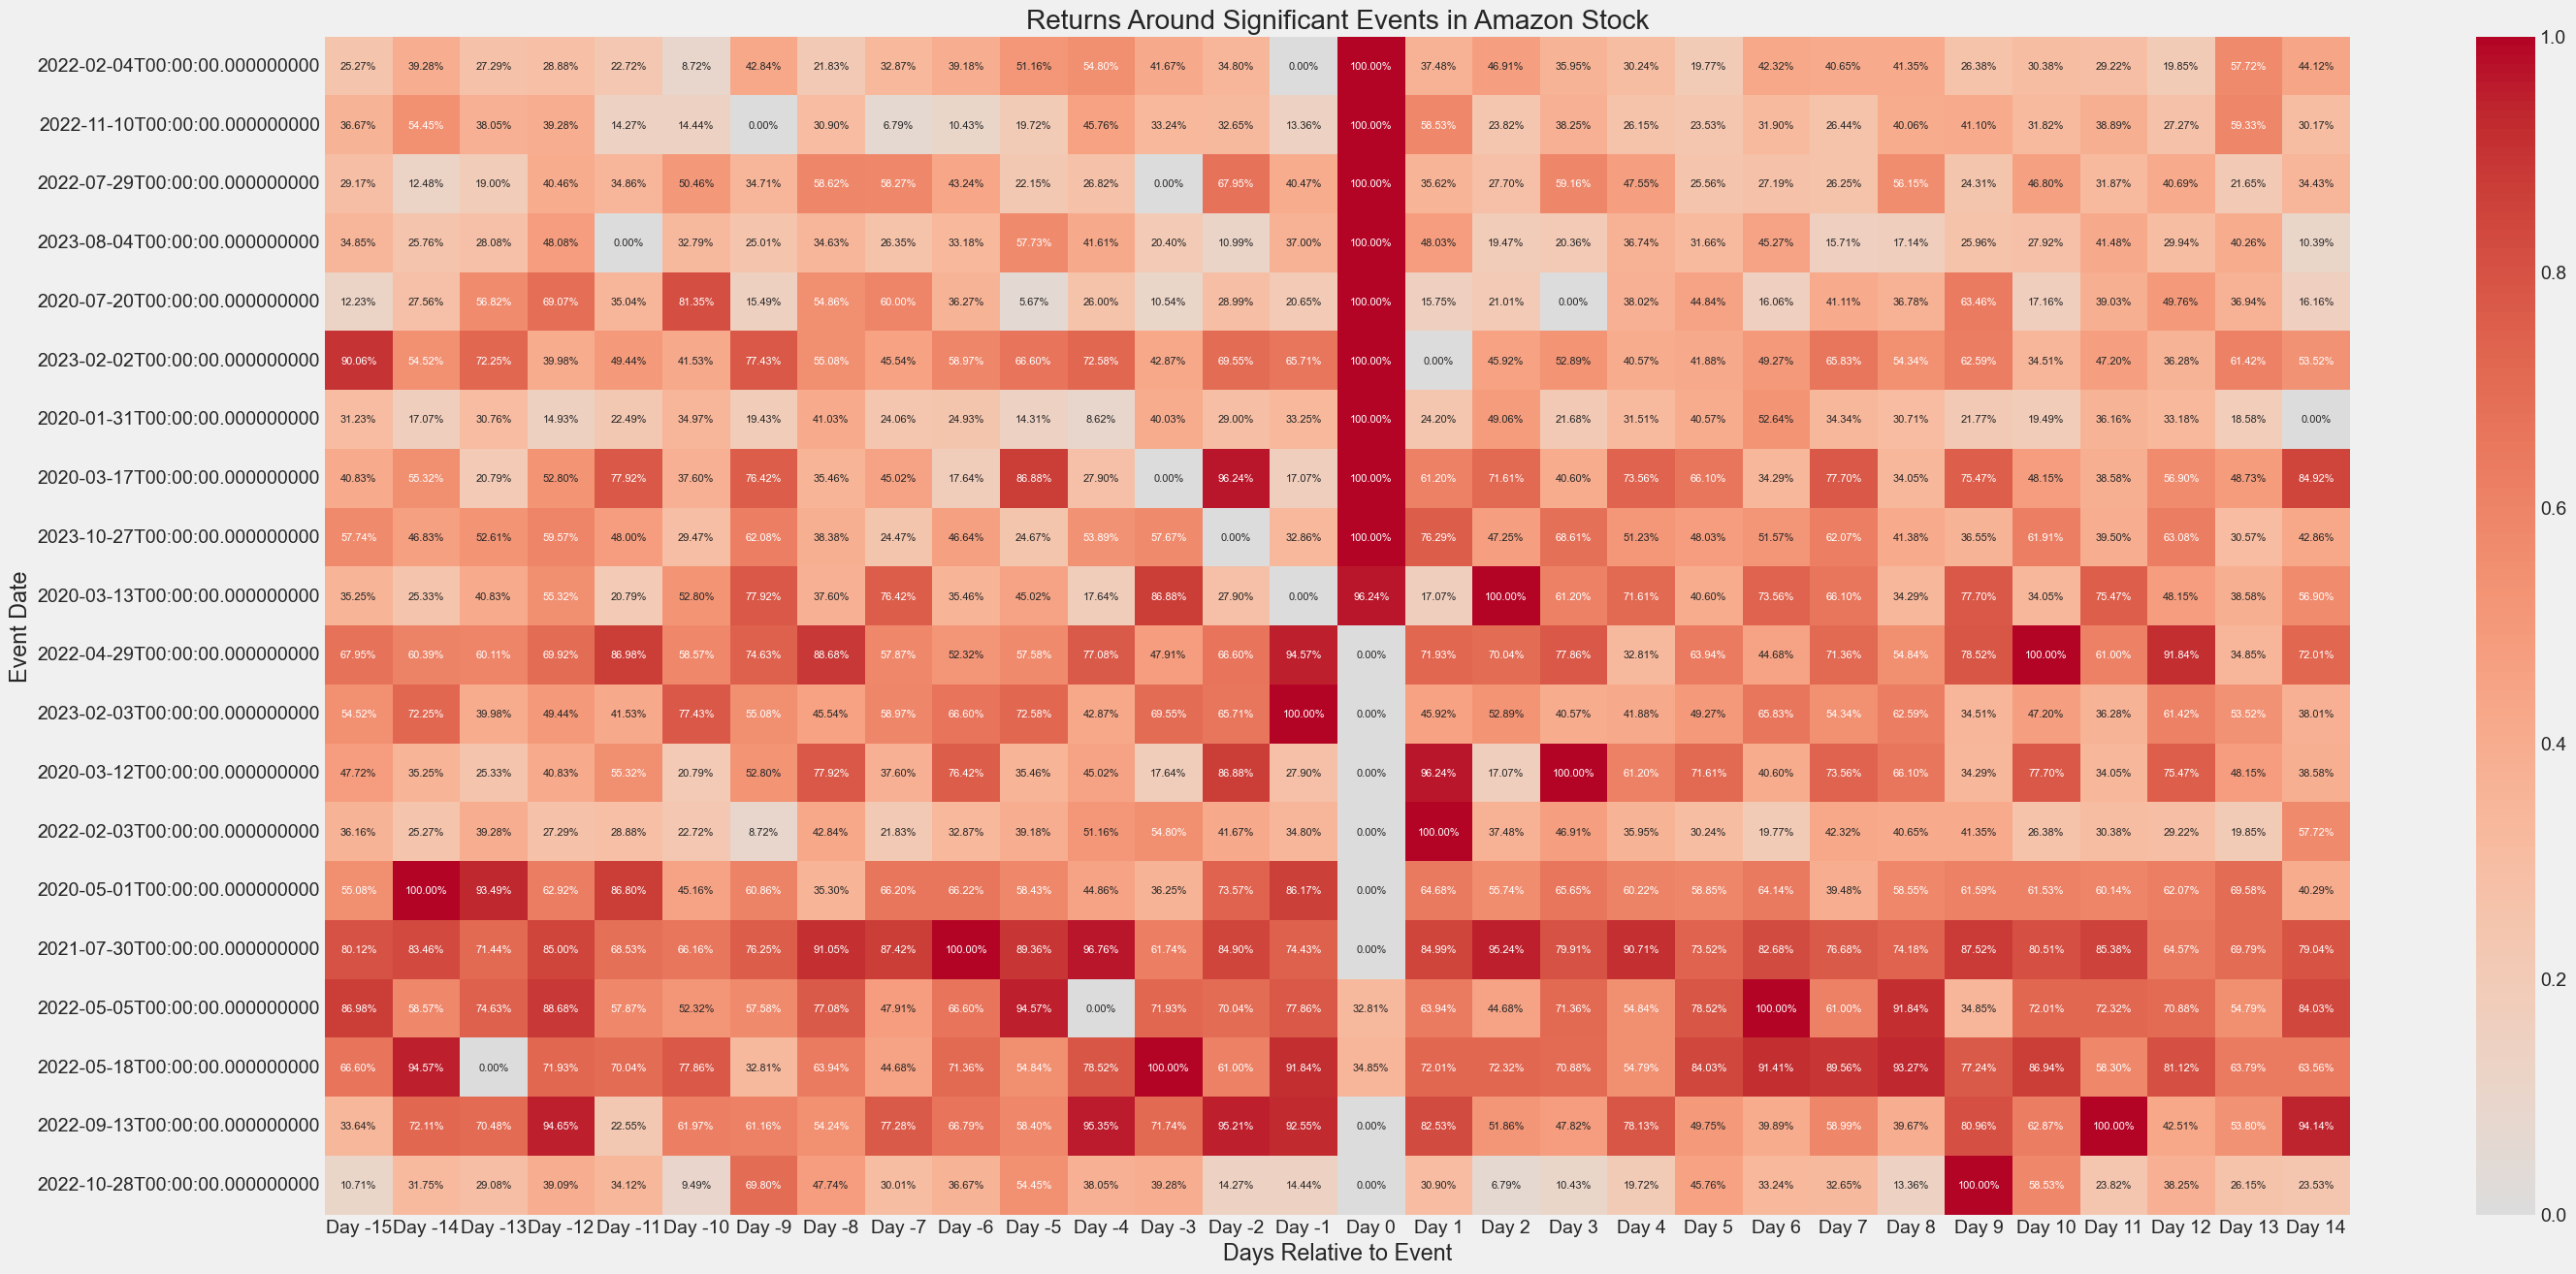

In [ ]:
# DataFrame for the heatmap
heatmap_df = pd.DataFrame(normalized_returns, index = significant_days.index, columns = [f'Day {i}' for i in range(-max_length//2, max_length//2)])
heatmap_df = heatmap_df.dropna()

# Plot the heatmap
plt.figure(figsize = (30, 15))
sns.heatmap(heatmap_df, cmap = 'coolwarm', center = 0, annot = True, fmt = '.2%', annot_kws = {"size": 8}, cbar = True)
plt.yticks(rotation = 0)
plt.title('Returns Around Significant Events in Amazon Stock')
plt.xlabel('Days Relative to Event')
plt.ylabel('Event Date')
plt.show()

In [ ]:
print("\nSignificant Events:")
for date, row in significant_days.iterrows():
    print(f"{date.date()}: Return = {row['Daily_Returns']:.2%}")
    print(f"Open: ${row['Open AMZN']:.2f}, High: ${row['High AMZN']:.2f}, Low: ${row['Low AMZN']:.2f}, Close: ${row['Adj Close AMZN']:.2f}")
    print("Volume:", row['Volume AMZN'])
    print("---")


Significant Events:
2022-02-04: Return = 13.54%
Open: $155.61, High: $161.20, Low: $150.61, Close: $157.64
Volume: 253456000.0
---
2022-11-10: Return = 12.18%
Open: $92.94, High: $98.69, Low: $91.65, Close: $96.63
Volume: 173414900.0
---
2022-07-29: Return = 10.36%
Open: $134.90, High: $137.65, Low: $132.41, Close: $134.95
Volume: 148892900.0
---
2023-08-04: Return = 8.27%
Open: $141.06, High: $143.63, Low: $139.32, Close: $139.57
Volume: 152938700.0
---
2020-07-20: Return = 7.93%
Open: $150.01, High: $160.07, Low: $149.70, Close: $159.84
Volume: 151964000.0
---
2023-02-02: Return = 7.38%
Open: $110.25, High: $114.00, Low: $108.88, Close: $112.91
Volume: 158154200.0
---
2020-01-31: Return = 7.38%
Open: $102.57, High: $102.79, Low: $100.11, Close: $100.44
Volume: 311346000.0
---
2020-03-17: Return = 7.03%
Open: $88.77, High: $92.89, Low: $84.46, Close: $90.39
Volume: 218342000.0
---
2023-10-27: Return = 6.83%
Open: $126.20, High: $130.02, Low: $125.52, Close: $127.74
Volume: 125309300.

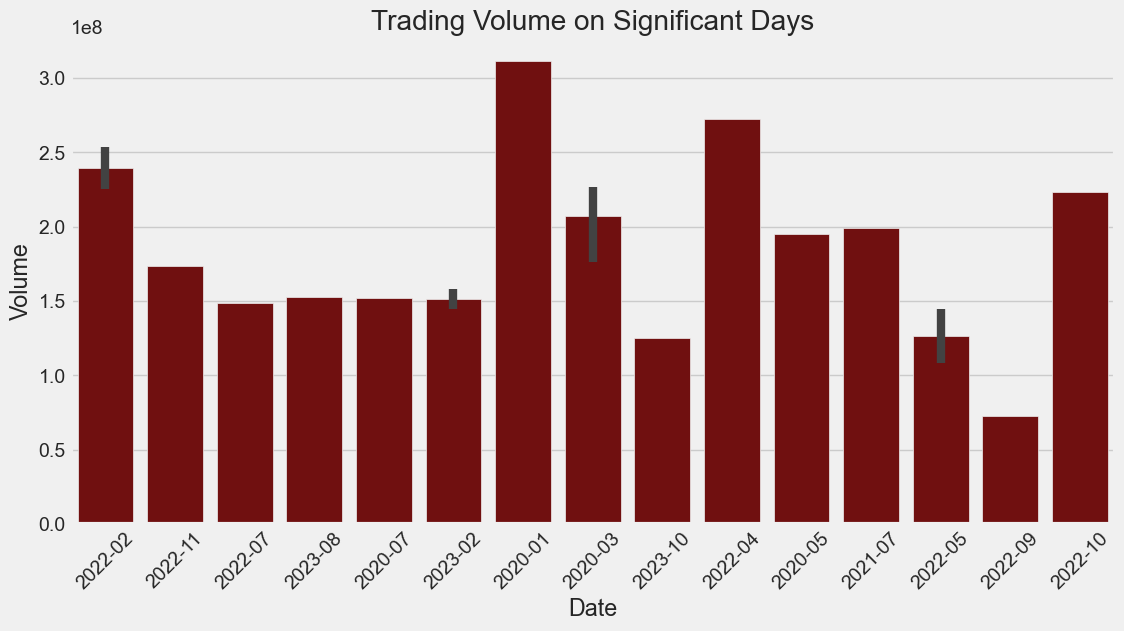

In [ ]:
# Plotting volume on significant days

plt.figure(figsize = (12, 6))
sns.barplot(x = significant_days.index.strftime('%Y-%m'), y = 'Volume AMZN', data = significant_days, color = 'maroon')
plt.title('Trading Volume on Significant Days')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation = 45)
plt.show()

# Question 4: What were the most volatile periods for Amazon's stock during the year?

Volatility represents how much the price of a stock fluctuates over a specific period. Higher volatility means that the stock price can change dramatically in a short time, while lower volatility indicates more stable prices. We are comparing the expected return with the standard deviation of the daily returns. A rolling window means that for each day, you're looking back at the previous 20 days to calculate the standard deviation

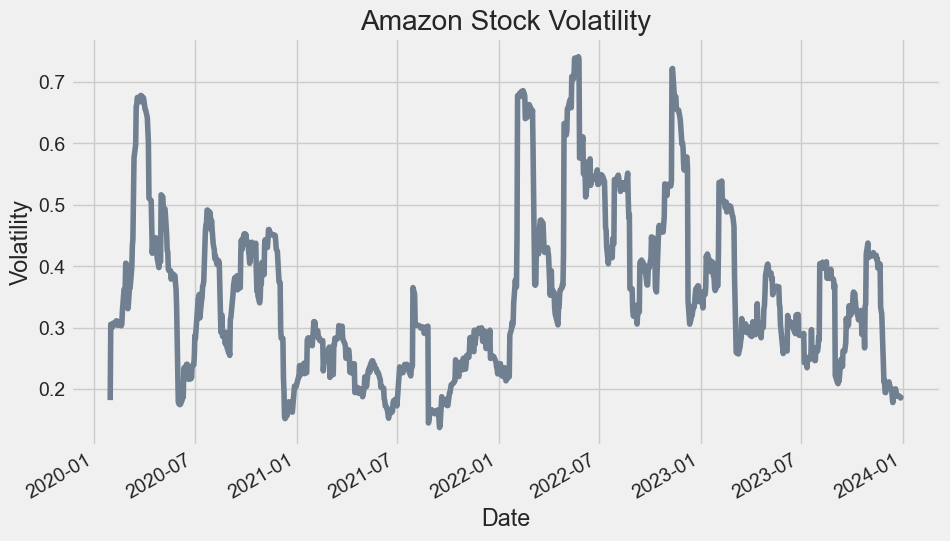

In [ ]:
# Calculate volatility

amzn['Volatility'] = amzn['Daily_Returns'].rolling(window = 20).std() * np.sqrt(252)
plt.figure(figsize = (10, 6))
amzn['Volatility'].plot(label = 'Volatility', color = 'slategrey')
plt.title('Amazon Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

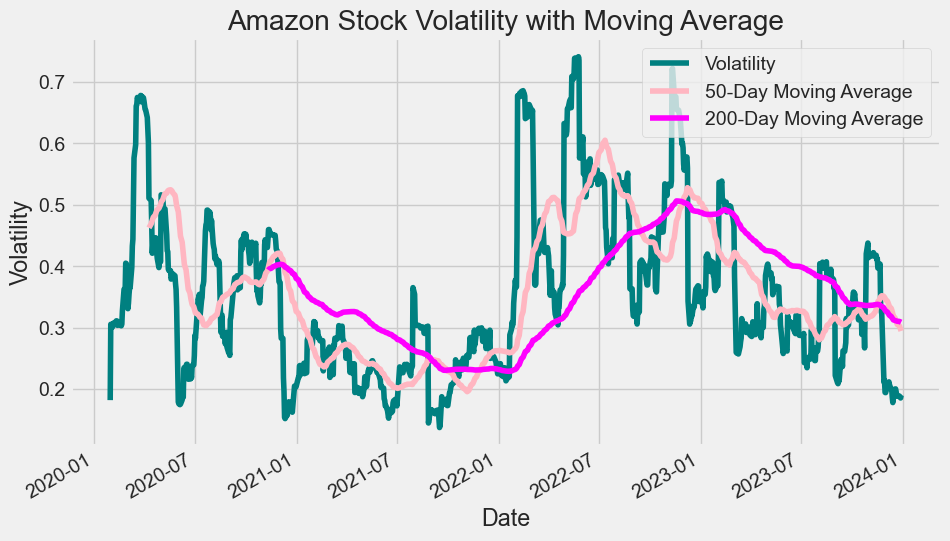

In [ ]:
# Calculate a moving average of volatility

amzn['Volatility_MA_50_days'] = amzn['Volatility'].rolling(window = 50).mean()
amzn['Volatility_MA_200_days'] = amzn['Volatility'].rolling(window = 200).mean()

plt.figure(figsize = (10, 6))
amzn['Volatility'].plot(label = 'Volatility', color = 'teal')
amzn['Volatility_MA_50_days'].plot(label = '50-Day Moving Average', color = 'lightpink')
amzn['Volatility_MA_200_days'].plot(label = '200-Day Moving Average', color = 'magenta')
plt.title('Amazon Stock Volatility with Moving Average')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Question 5: Did Amazon's stock outperform or underperform its own historical averages?

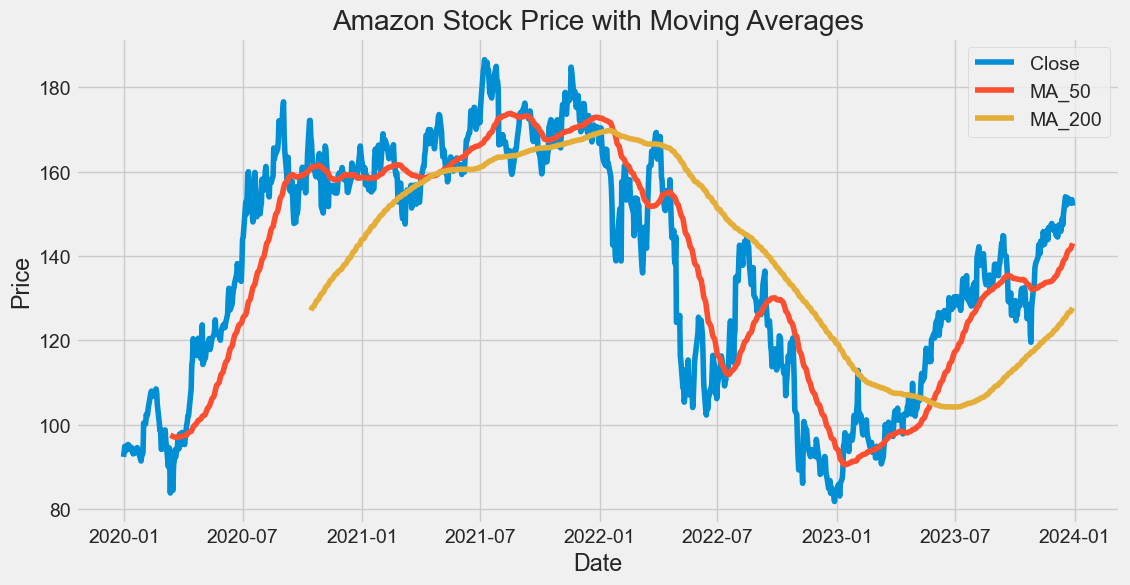

In [ ]:
# Calculating moving averages

amzn['MA_50'] = amzn['Adj Close AMZN'].rolling(window = 50).mean()
amzn['MA_200'] = amzn['Adj Close AMZN'].rolling(window = 200).mean()

# Plotting moving averages

plt.figure(figsize = (12, 6))
plt.plot(amzn.index, amzn[['Adj Close AMZN', 'MA_50', 'MA_200']])
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Close', 'MA_50', 'MA_200'])
plt.show()

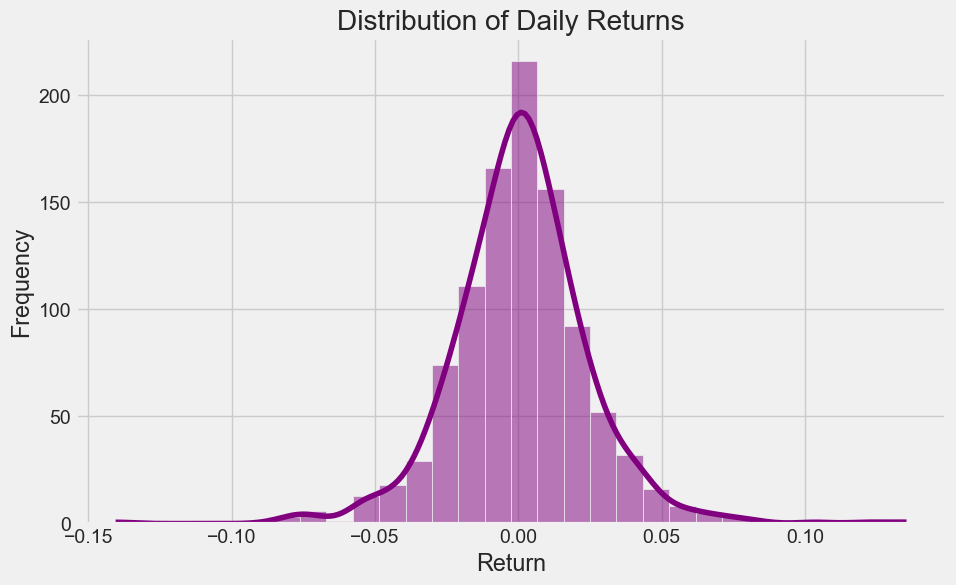

In [ ]:
# Plot daily returns distribution

plt.figure(figsize = (10, 6))
sns.histplot(amzn_returns, bins = 30, kde = True, color = 'purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to do technical analysis on stock market data.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.